In [95]:
from __future__ import print_function
from tensorflow.keras.preprocessing.image import ImageDataGenerator,array_to_img,img_to_array,load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,BatchNormalization,Flatten,MaxPooling2D,Conv2D
import os

In [96]:
num_classes = 5 #angry,happy,neutral,sad,fear
img_row,img_col=48,48
batch_size=32
train_data_url=r"C:\Users\navan\Desktop\images\train"
validation_data_url= r"C:\Users\navan\Desktop\images\validation"


In [97]:
train_datagen=ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
            )

In [98]:
valid_datagen=ImageDataGenerator(
              rescale=1./255,
    
)

In [99]:
train_generator=train_datagen.flow_from_directory(
                    train_data_url,
                    color_mode='grayscale',
                    target_size=(img_row,img_col),
                    batch_size=batch_size,
                    class_mode='categorical',
                    shuffle=True
)

Found 25180 images belonging to 5 classes.


In [100]:
validation_generator=valid_datagen.flow_from_directory(
                     validation_data_url,
                     color_mode='grayscale',
                     target_size=(img_row,img_col),
                     batch_size=batch_size,
                     class_mode='categorical',
                     shuffle=True
)
dir(validation_generator)
print(validation_generator.class_mode,validation_generator.class_indices)

Found 6158 images belonging to 5 classes.
categorical {'angry': 0, 'fear': 1, 'happy': 2, 'neutral': 3, 'sad': 4}


In [101]:
model=Sequential()

In [102]:
model.add(Conv2D(32,kernel_size=3,kernel_initializer='he_normal',input_shape=(img_row,img_col,1),padding='same'))
model.add(Activation('elu'))
model.add(Conv2D(32,kernel_size=3,kernel_initializer='he_normal',padding='same'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

In [103]:
model.add(Conv2D(64,kernel_size=3,kernel_initializer='he_normal',padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(64,kernel_size=3,kernel_initializer='he_normal',padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

In [104]:
model.add(Conv2D(128,kernel_size=3,kernel_initializer='he_normal',padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(128,kernel_size=3,kernel_initializer='he_normal',padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

In [105]:
model.add(Conv2D(256,kernel_size=3,kernel_initializer='he_normal',padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(Conv2D(256,kernel_size=3,kernel_initializer='he_normal',padding='same'))
model.add(Activation('elu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(2))

In [106]:
model.add(Flatten())
model.add(Dense(64,activation='elu'))
model.add(BatchNormalization())

In [107]:
model.add(Dense(64,activation='elu'))
model.add(BatchNormalization())

In [108]:
model.add(Dense(num_classes,activation='softmax'))

In [109]:
print(model.summary())

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 48, 48, 32)        320       
_________________________________________________________________
activation_28 (Activation)   (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_36 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
activation_29 (Activation)   (None, 24, 24, 64)       

In [110]:
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping,ReduceLROnPlateau

In [111]:
checkpoint=ModelCheckpoint(r'C:\Users\navan\Desktop\face_exp\face_exp_SimpleCNN.h5',
                          monitor='val_loss',
                          mode='min',
                          save_best_only=True,
                          verbose=1)

In [113]:
reduce_lr=ReduceLROnPlateau(monitor='val_loss',
                          factor=0.2,
                          patience=5,
                          verbose=1,
                          min_delat=0.0001)

In [118]:
callbacks=[checkpoint,reduce_lr]

In [119]:
model.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [120]:
epochs=30
nb_train_samples=len(train_generator)
nb_val_samples=len(validation_generator)

the model had earlier been trained for 12 epochs before earlystop which has been removed in this version, thus the starting accuracy is much higher

In [121]:
history=model.fit_generator(
        train_generator,
        steps_per_epoch=nb_train_samples,
        epochs=epochs,
        callbacks=callbacks,
        validation_data=validation_generator,
        validation_steps=nb_val_samples)

Epoch 1/30
787/787 [==============================] - 186s 235ms/step - loss: 1.1390 - accuracy: 0.5439 - val_loss: 1.1821 - val_accuracy: 0.5193

Epoch 00001: val_loss did not improve from 1.08103
Epoch 2/30
787/787 [==============================] - 188s 239ms/step - loss: 1.1136 - accuracy: 0.5520 - val_loss: 1.0420 - val_accuracy: 0.5778

Epoch 00002: val_loss improved from 1.08103 to 1.04196, saving model to C:\Users\navan\Desktop\face_exp\face_exp_SimpleCNN.h5
Epoch 3/30
787/787 [==============================] - 191s 243ms/step - loss: 1.1025 - accuracy: 0.5564 - val_loss: 1.0364 - val_accuracy: 0.5804

Epoch 00003: val_loss improved from 1.04196 to 1.03637, saving model to C:\Users\navan\Desktop\face_exp\face_exp_SimpleCNN.h5
Epoch 4/30
787/787 [==============================] - 215s 274ms/step - loss: 1.0875 - accuracy: 0.5626 - val_loss: 1.0910 - val_accuracy: 0.5638

Epoch 00004: val_loss did not improve from 1.03637
Epoch 5/30
787/787 [==============================] - 201s

In [122]:
import matplotlib.pyplot as plt

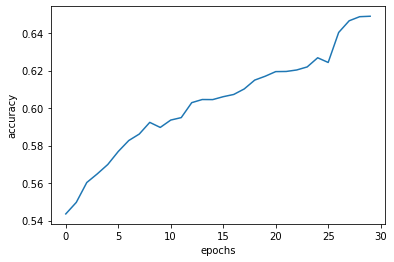

In [124]:
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.plot(history.history['accuracy'])
plt.show()

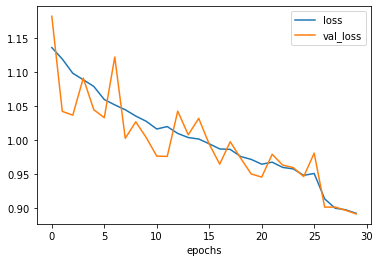

In [128]:
plt.xlabel('epochs')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss','val_loss'])
plt.show()